<a href="https://colab.research.google.com/github/Cassio295/Projetos-DIO/blob/main/Calculo_de_M%C3%A9tricas_de_Avalia%C3%A7%C3%A3o_do_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para esse desafio vou reaproveitar o código de um desafio passado onde no final irei gerar a matriz de confusão
e a partir dela irei calcular as métricas de avaliação.

In [1]:
import os
import zipfile
import tensorflow as tf
from PIL import Image

In [2]:
diretorio_dados = '/content' #Caminho para meus dados
#Url dos dados
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
#Baixando os dados e criando a pasta com os arquivos
dados = tf.keras.utils.get_file(origin = url, extract = True, fname='cats_and_dogs_filtered.zip', cache_dir=diretorio_dados)

In [3]:
# Definindo os caminhos para as pastas de treino e teste
caminho_treino    = '/content/datasets/cats_and_dogs_filtered/train'
caminho_validacao = '/content/datasets/cats_and_dogs_filtered/validation'

In [4]:
batch_size = 32 #Batch_size representa o números de fetures que eu quero trazer por vez do meu dataset
epochs = 12
larning_rate = 0.0001
class_name = ['cat', 'dog']

In [55]:
# Criando os datasets de treino e teste
from tensorflow.keras.preprocessing.image import ImageDataGenerator
resc_data = ImageDataGenerator(rescale= 1./255)

dataset_train = resc_data.flow_from_directory(
    caminho_treino,
    target_size = (150, 150),
    batch_size = batch_size,
    class_mode = 'binary',

)

dataset_validation = resc_data.flow_from_directory(
    caminho_validacao,
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


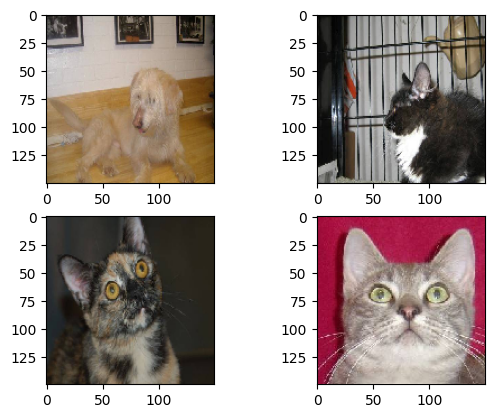

In [104]:
# Plotando algumas imagems
import matplotlib.pyplot as plt
imagens, labels = next(dataset_train)

for n in range(4):
  plt.subplot(2,2 ,n+1)
  plt.imshow(imagens[n])



plt.show()


In [58]:
# Fazendo o Data Argumentation para os dados
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip('horizontal', input_shape = (150,150 ,3)),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1)
    ]
)

In [69]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(data_augmentation)

model.add(layers.Conv2D(16, (3,3), padding = 'same', activation = 'relu', input_shape = (150,150,3)))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3) ,padding = 'same', activation = 'relu'))

model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation = 'relu'))

model.add(layers.Dense(1, activation = 'sigmoid'))






In [70]:
# Compilando o modelo
opt = tf.keras.optimizers.Adam(learning_rate = larning_rate)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [71]:
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = epochs
)

Epoch 1/12
63/63 [==============================] - 98s 2s/step - loss: 0.6888 - accuracy: 0.5570 - val_loss: 0.6667 - val_accuracy: 0.6360
Epoch 2/12
63/63 [==============================] - 98s 2s/step - loss: 0.6421 - accuracy: 0.6330 - val_loss: 0.6221 - val_accuracy: 0.6470
Epoch 3/12
63/63 [==============================] - 86s 1s/step - loss: 0.6122 - accuracy: 0.6760 - val_loss: 0.6132 - val_accuracy: 0.6500
Epoch 4/12
63/63 [==============================] - 98s 2s/step - loss: 0.5880 - accuracy: 0.6905 - val_loss: 0.5980 - val_accuracy: 0.6680
Epoch 5/12
63/63 [==============================] - 88s 1s/step - loss: 0.5937 - accuracy: 0.6730 - val_loss: 0.5861 - val_accuracy: 0.6790
Epoch 6/12
63/63 [==============================] - 97s 2s/step - loss: 0.5806 - accuracy: 0.6975 - val_loss: 0.6099 - val_accuracy: 0.6580
Epoch 7/12
63/63 [==============================] - 88s 1s/step - loss: 0.5573 - accuracy: 0.7200 - val_loss: 0.6076 - val_accuracy: 0.6650
Epoch 8/12
63/63 [==

In [72]:
import numpy as np
predict = model.predict(dataset_validation)


32/32 [==============================] - 11s 334ms/step


In [80]:
y_pred = np.where(predict < 0.5, 0, 1)
y_true = dataset_validation.classes

In [95]:
y_pred.shape
y_pred = np.squeeze(y_pred)


In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Gerando a matriz de confusão

cn = confusion_matrix(y_true, y_pred)

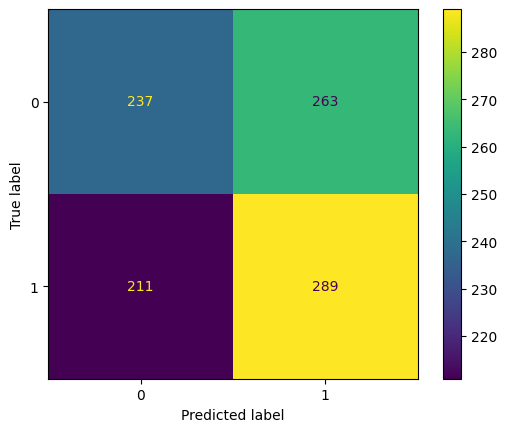

In [108]:
# plotando minha matriz de confução
cm_display = ConfusionMatrixDisplay(cn)
cm_display.plot()
plt.show()



In [126]:
# Acurácia (VP + VN) TOTAL DE AMOSTRAS
acuracia = (237+289)/ 1000

# Sensibilidade VP /(VP + FN)
sense = 237 / (237 + 263)

# Especificidade
especi = 289 / (263 + 289 )

# Precisão
preci = 237 / (237 +263)

# F-1 Score

fScor = 2 * ((preci * sense) / (preci + sense))

print('As metricas de avaliação do modelo forma')
print('_' * 50)

print(f'Acurácia {acuracia:.2f}%')
print('_' * 50)

print(f'Sensibilidade {sense}%')
print('_' * 50)

print(f'Especificidade {especi:.2f}%')
print('_' * 50)

print(f'Precisão {preci}%')
print('_' * 50)

print(f'F-score {fScor}%')


As metricas de avaliação do modelo forma
__________________________________________________
Acurácia 0.53%
__________________________________________________
Sensibilidade 0.474%
__________________________________________________
Especificidade 0.52%
__________________________________________________
Precisão 0.474%
__________________________________________________
F-score 0.474%
